# SIR modelling

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy.optimize import curve_fit
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)



In [3]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,India,Germany,China
0,2020-01-22,0,1,0,0,548
1,2020-01-23,0,1,0,0,643
2,2020-01-24,0,2,0,0,920
3,2020-01-25,0,2,0,0,1406
4,2020-01-26,0,5,0,0,2075


In [4]:
country_list=['Italy','US','India','Germany','China']

In [5]:
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [6]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to curves

In [7]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

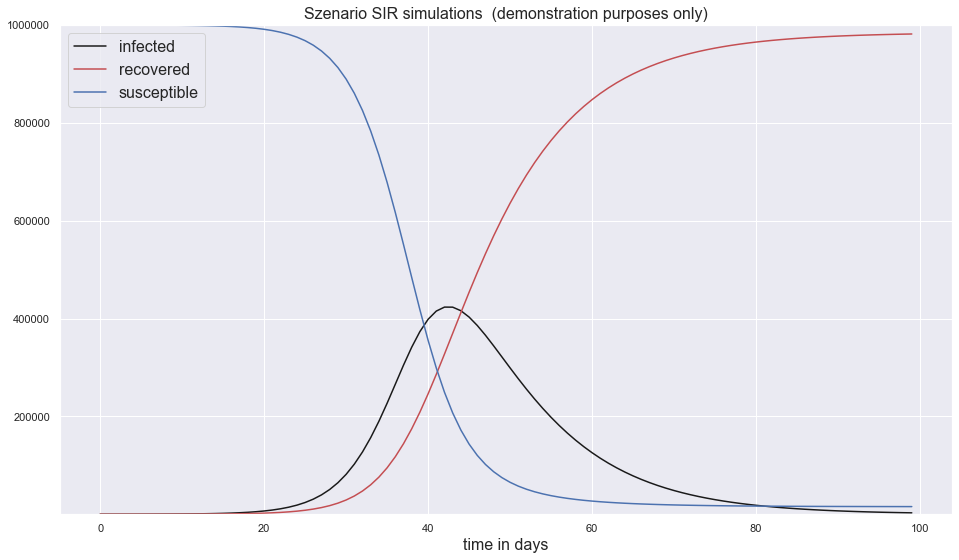

In [8]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered',color='r')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the Suitable parameters of SIR model


In [11]:
 for each in df_analyse:
    fitdata=np.array(df_analyse[each]) #individual country

In [12]:
fitdata

array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591,
       81661, 81782, 81897, 81999, 82122, 82198, 82279, 82361, 82432,
       82511, 82543, 82602, 82665, 82718, 82809, 82883, 82941, 83014,
       83134, 83213, 83306, 83356, 83403, 83760, 83787, 83805, 83817,
       83853, 83868, 83884, 83899, 83909, 83912, 83918, 83940, 83944,
       83956, 83959, 83959, 83964, 83966, 83968, 83970, 83975, 83976,
       83990, 84010, 84011, 84018, 84024, 84029, 84038, 84044, 84054,
       84063, 84063, 84063, 84063, 84081, 84084, 84095, 84102, 84103,
       84106, 84106,

In [14]:
# N0=5000000
# t=np.arange(len(fitdata))

# for each in countrylist['India']:

#     #df_plot=df_analyseSIR[df_analyseSIR['country']==each]
#     #df_plot=df_plot[['state','country','confirmed','date']].groupby(['country','date']).agg(np.mean).reset_index()
    
#     fitdata=np.array(df_analyseSIR[each])#.reshape(-1,1)  
# #t=np.arange(len(fitdata))

# #N0=1000000
#     I0=fitdata[0]
#     S0=N0-I0
#     R0=0

#     popt=[0.4,0.1]
    
#     popt,pcov = curve_fit(fit_odeint,t,fitdata,maxfev=15000) #,bounds=(1,len(t)))

#     perr = np.sqrt(np.diag(pcov))
#     #print(popt)
#     fitted=fit_odeint(t, *popt)#.reshape(-1,1)
#     print('fitted', fitted)
#     df_analyseSIR[each + '_SIR']=fitted

#     #fitted=fit_odeint(t, *popt)
#     #df_analyseSIR[each + '_sir']
    

In [15]:
t=np.arange(len(fitdata))

In [16]:
I0=fitdata[0]
S0=1000000
R0=0
beta

0.4

In [17]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [18]:
#defining the fit function

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t,(S0,I0,R0),t,args=(beta,gamma)) [:,1] #this is only for infection(dI)

In [19]:
#example for the differential equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([548.        , 537.14793729, 526.50896836, 516.07898017,
       505.85393625, 495.82987571, 486.00291127, 476.36922816,
       466.92508339, 457.66680398, 448.59078597, 439.69349311,
       430.97145576, 422.42126961, 414.03959463, 405.82315385,
       397.76873244, 389.87317635, 382.1333912 , 374.54634118,
       367.10904814, 359.81859102, 352.67210418, 345.66677662,
       338.79985109, 332.06862272, 325.47043823, 319.00269529,
       312.66284148, 306.44837332, 300.35683507, 294.3858182 ,
       288.53296051, 282.79594526, 277.17250023, 271.66039693,
       266.25744986, 260.96151568, 255.77049241, 250.68231864,
       245.69497278, 240.80647236, 236.0148733 , 231.31826915,
       226.71479036, 222.20260365, 217.77991133, 213.44495062,
       209.19599291, 205.03134317, 200.9493394 , 196.94835192,
       193.02678285, 189.18306544, 185.41566341, 181.72307023,
       178.10380894, 174.55643141, 171.0795178 , 167.67167608,
       164.33154136, 161.05777523, 157.84906561, 154.70

In [20]:
popt, pcov = optimize.curve_fit(fit_odeint,t,fitdata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',fitdata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.01393582 0.00242474]  start infect: 548
Optimal parameters: beta = 0.605443084237883  and gamma =  0.06819015909159089


In [21]:
fitted=fit_odeint(t, *popt)

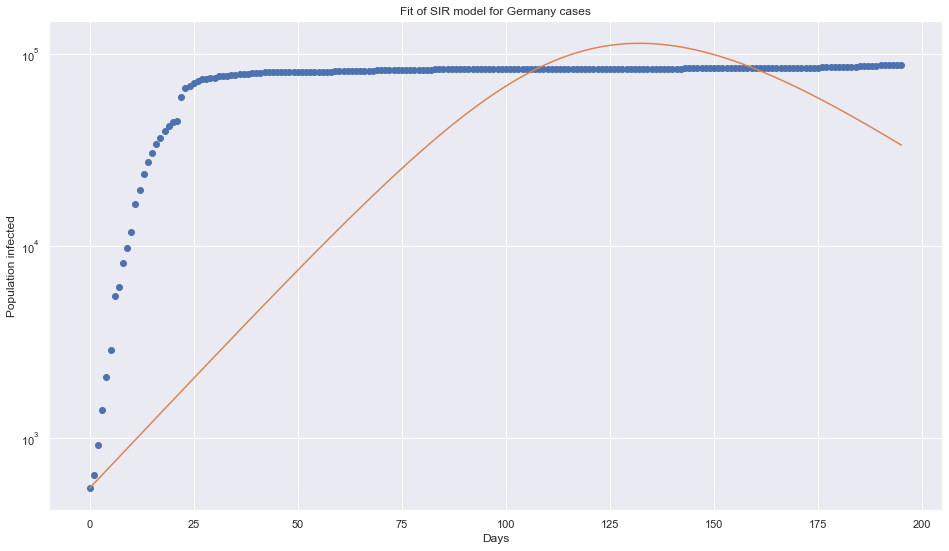

Optimal parameters: beta = 0.605443084237883  and gamma =  0.06819015909159089
Basic Reproduction Number R0  8.878745735505188
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [22]:
plt.semilogy(t, fitdata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR(Infection rate)

In [23]:
df_analyseSIR=pd.read_csv('../data/processed/COVID_full_flat_table.csv',sep=';') 
df_analyseSIR.sort_values('date',ascending=True).iloc[35:].head()

t_initial=24
t_intro =14
t_hold  =21
t_relax =21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro),
                       np.array(t_hold*[beta_min]),
                       np.linspace(beta_min,beta_max,t_relax),
                       ))

In [24]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.37769231, 0.35538462, 0.33307692, 0.31076923, 0.28846154,
       0.26615385, 0.24384615, 0.22153846, 0.19923077, 0.17692308,
       0.15461538, 0.13230769, 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.1245    , 0.139     , 0.1535    , 0.168     , 0.1825    ,
       0.197     , 0.2115    , 0.226     , 0.2405    , 0.255     ,
       0.2695    , 0.284     , 0.2985    , 0.313     , 0.3275 

In [25]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

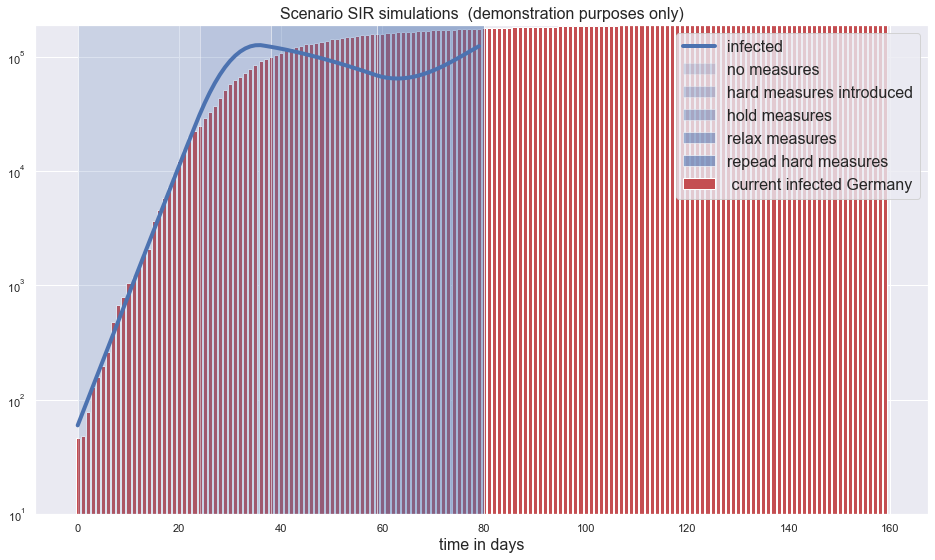

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=4)

t_phases=np.array([t_initial,t_intro,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(fitdata)),fitdata, width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='upper right', prop={'size': 16});